# Chapter 4: Dimension Reduction

In [1]:
# import required packages for this chapter
from pathlib import Path

import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn import preprocessing

import matplotlib.pylab as plt
import seaborn as sns

%matplotlib inline

# Problem 4.1 Breakfast Cereals

Use the data for the breakfast cereals example in Section 4.8 to explore and summarize the data as follows:

__4.1.a.__ Which variables are quantitative/numerical? Which are ordinal? Which are nominal?


In [2]:
# load the data
cereals_df = pd.read_csv('cereals.csv')
cereals_df.shape

(77, 16)

In [3]:
# variable types
cereals_df.dtypes

name         object
mfr          object
type         object
calories      int64
protein       int64
fat           int64
sodium        int64
fiber       float64
carbo       float64
sugars      float64
potass      float64
vitamins      int64
shelf         int64
weight      float64
cups        float64
rating      float64
dtype: object

Quantitative variables: calories, protein, fat, sodium, fiber, carbo, sugars, potass, vitamins, weight, cups, shelf, and rating.

Nominal variables: type and mfr.

Ordinal Variables: shelf.

__4.1.b.__ Compute the mean, median, min, max, and standard deviation for each of the quantitative variables. This can be done using pandas as shown in Table 4.3.

In [4]:
quant_vars = ['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins', 'weight', 'cups', 
              'shelf', 'rating']
all_numeric_df = cereals_df[quant_vars]


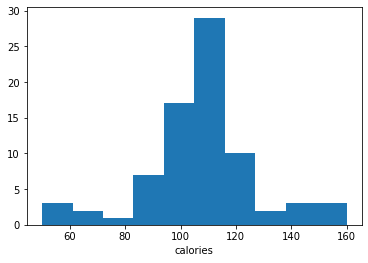

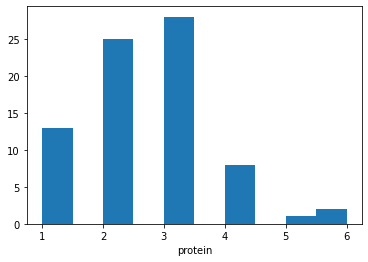

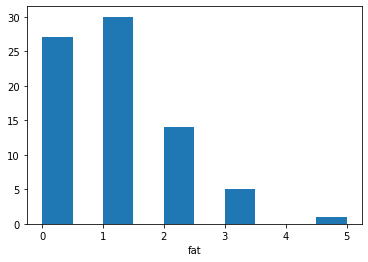

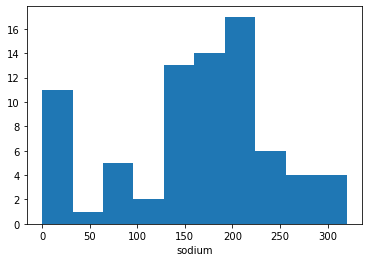

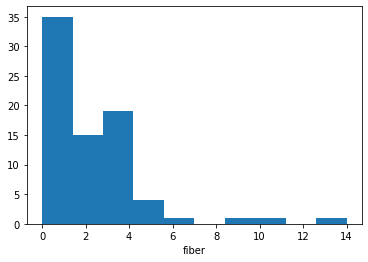

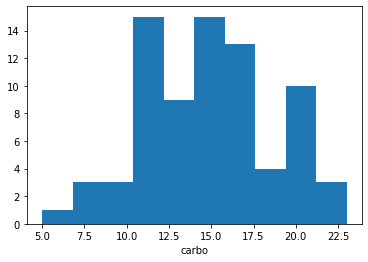

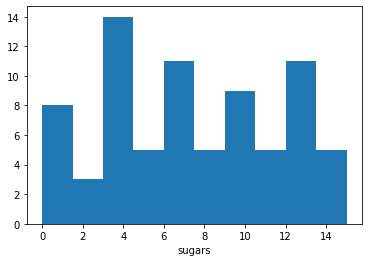

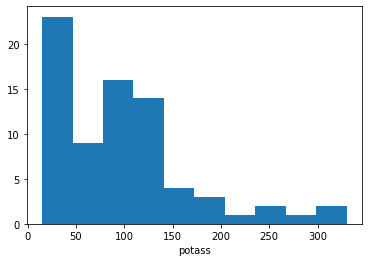

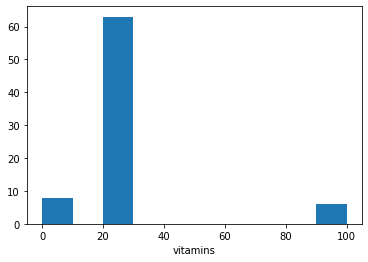

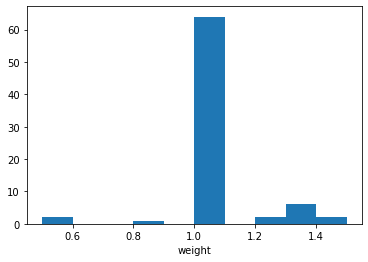

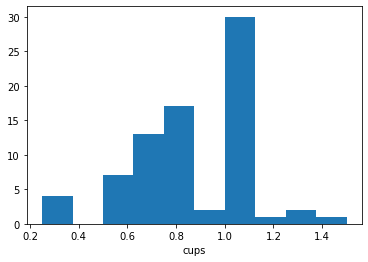

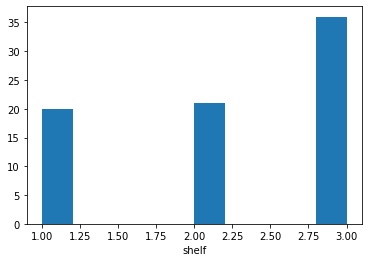

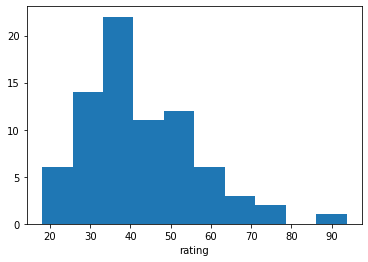

In [5]:
for var in quant_vars:
    plt.hist(all_numeric_df[var].dropna())
    plt.xlabel(var)
    plt.show()

In [6]:
# data with just quantitative variables
quant_vars = ['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins', 'weight', 'cups', 
              'shelf', 'rating']
all_numeric_df = cereals_df[quant_vars]
pd.DataFrame({'mean': all_numeric_df.mean(),
              'mediun': all_numeric_df.median(),
              'min': all_numeric_df.min(),
              'max': all_numeric_df.max(),
              'sd': all_numeric_df.std(),
})

,mean,mediun,min,max,sd
calories,106.883117,110.000000,50.000000,160.000000,19.484119
protein,2.545455,3.000000,1.000000,6.000000,1.094790
fat,1.012987,1.000000,0.000000,5.000000,1.006473
sodium,159.675325,180.000000,0.000000,320.000000,83.832295
fiber,2.151948,2.000000,0.000000,14.000000,2.383364
carbo,14.802632,14.500000,5.000000,23.000000,3.907326
sugars,7.026316,7.000000,0.000000,15.000000,4.378656
potass,98.666667,90.000000,15.000000,330.000000,70.410636
vitamins,28.246753,25.000000,0.000000,100.000000,22.342523
weight,1.029610,1.000000,0.500000,1.500000,0.150477


__4.1.c.__ Plot a histogram for each of the quantitative variables. Based on the histograms and summary statistics, answer the following questions:

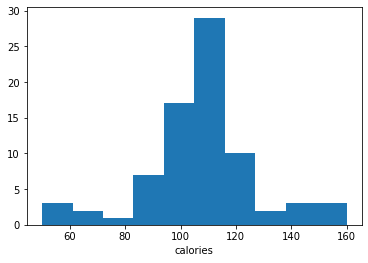

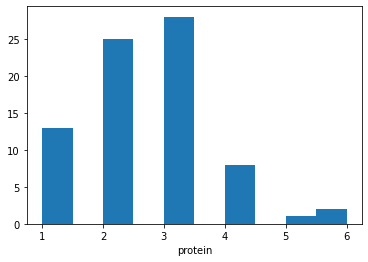

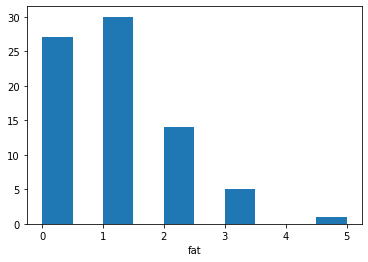

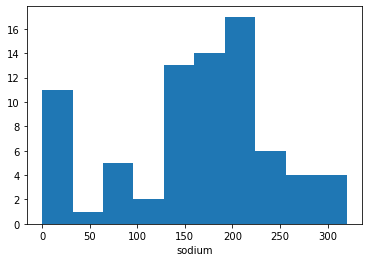

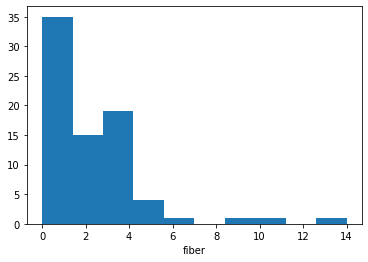

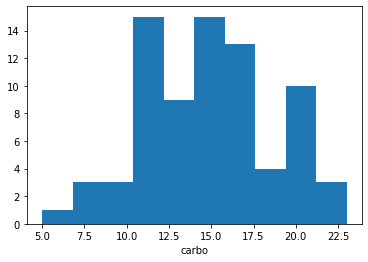

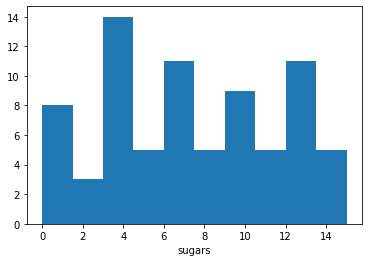

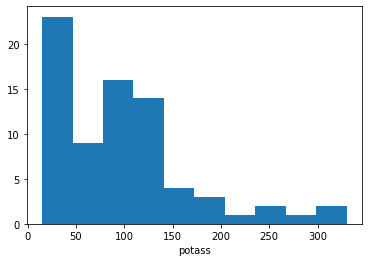

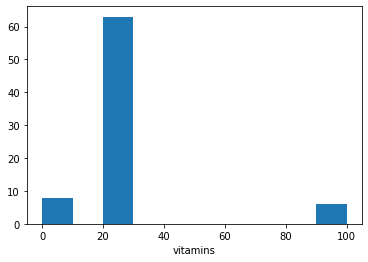

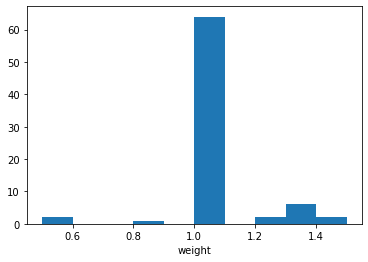

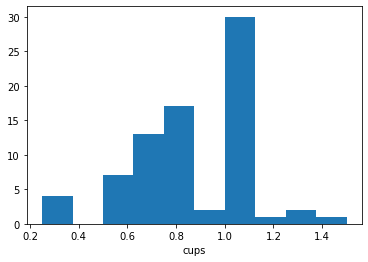

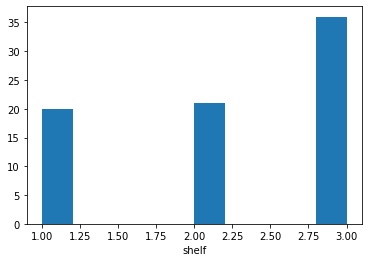

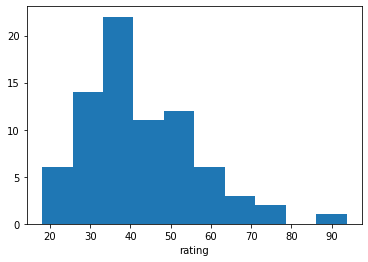

In [7]:
# histograms for quantitative variables

for var in quant_vars:
    #fig, axes = plt.subplots(nrows=1, ncols=2)
    plt.hist(all_numeric_df[var].dropna())
    plt.xlabel(var)
    plt.show()

__4.1.c.i.__ Which variables have the largest variability?

Sodium and Potass have the largest variability.

__4.1.c.ii.__ Which variables seem skewed?

Variables Fiber, Potass and Rating are all positively skewed.

__4.1.f.__ Compute the correlation table for the quantitative variables (method corr()). In addition, generate a matrix plot for these variables (see Table 3.4 on how to do this using the seaborn library).

In [8]:
# correlation table for the quantitative variables

corr = all_numeric_df.corr()
corr

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,weight,cups,shelf,rating
calories,1.000000,0.019066,0.498610,0.300649,-0.293413,0.257638,0.566533,-0.072063,0.265356,0.696091,0.087200,0.097234,-0.689376
protein,0.019066,1.000000,0.208431,-0.054674,0.500330,-0.025012,-0.291853,0.563706,0.007335,0.216158,-0.244469,0.133865,0.470618
fat,0.498610,0.208431,1.000000,-0.005407,0.016719,-0.300003,0.302497,0.200445,-0.031156,0.214625,-0.175892,0.263691,-0.409284
sodium,0.300649,-0.054674,-0.005407,1.000000,-0.070675,0.297687,0.058866,-0.042632,0.361477,0.308576,0.119665,-0.069719,-0.401295
fiber,-0.293413,0.500330,0.016719,-0.070675,1.000000,-0.380357,-0.138760,0.911528,-0.032243,0.247226,-0.513061,0.297539,0.584160
carbo,0.257638,-0.025012,-0.300003,0.297687,-0.380357,1.000000,-0.471184,-0.365003,0.219202,0.138467,0.367460,-0.192650,0.088712
sugars,0.566533,-0.291853,0.302497,0.058866,-0.138760,-0.471184,1.000000,0.001414,0.098231,0.455844,-0.048961,0.068377,-0.763902
potass,-0.072063,0.563706,0.200445,-0.042632,0.911528,-0.365003,0.001414,1.000000,-0.005427,0.419933,-0.501607,0.385784,0.416009
vitamins,0.265356,0.007335,-0.031156,0.361477,-0.032243,0.219202,0.098231,-0.005427,1.000000,0.320324,0.128405,0.299262,-0.240544
weight,0.696091,0.216158,0.214625,0.308576,0.247226,0.138467,0.455844,0.419933,0.320324,1.000000,-0.199583,0.190762,-0.298124


__4.1.f.i.__ Which pair of variables is most strongly correlated?

From the correlation matrix, fiber and potass are the most strongly (positively) correlated. Fat and calories are also positively correlated.

# Problem 4.2 University Rankings. 

The dataset on American college and university rankings (available from www.dataminingbook.com) contains information on 1302 American colleges and universities offering an undergraduate program. For each university, there are 17 measurements that include continuous measurements (such as tuition and graduation rate) and categorical measurements (such as location by state and whether it is a private or a public school). 

In [9]:
# load the data and review

universities_df = pd.read_csv('Universities.csv')
universities_df.head()

,College Name,State,Public (1)/ Private (2),# appli. rec'd,# appl. accepted,# new stud. enrolled,% new stud. from top 10%,% new stud. from top 25%,# FT undergrad,# PT undergrad,in-state tuition,out-of-state tuition,room,board,add. fees,estim. book costs,estim. personal $,% fac. w/PHD,stud./fac. ratio,Graduation rate
0,Alaska Pacific University,AK,2,193.0,146.0,55.0,16.0,44.0,249.0,869.0,7560.0,7560.0,1620.0,2500.0,130.0,800.0,1500.0,76.0,11.9,15.0
1,University of Alaska at Fairbanks,AK,1,1852.0,1427.0,928.0,NaN,NaN,3885.0,4519.0,1742.0,5226.0,1800.0,1790.0,155.0,650.0,2304.0,67.0,10.0,NaN
2,University of Alaska Southeast,AK,1,146.0,117.0,89.0,4.0,24.0,492.0,1849.0,1742.0,5226.0,2514.0,2250.0,34.0,500.0,1162.0,39.0,9.5,39.0
3,University of Alaska at Anchorage,AK,1,2065.0,1598.0,1162.0,NaN,NaN,6209.0,10537.0,1742.0,5226.0,2600.0,2520.0,114.0,580.0,1260.0,48.0,13.7,NaN
4,Alabama Agri. & Mech. Univ.,AL,1,2817.0,1920.0,984.0,NaN,NaN,3958.0,305.0,1700.0,3400.0,1108.0,1442.0,155.0,500.0,850.0,53.0,14.3,40.0


In [10]:
var = list(universities_df.columns)
var

['College Name',
 'State',
 'Public (1)/ Private (2)',
 "# appli. rec'd",
 '# appl. accepted',
 '# new stud. enrolled',
 '% new stud. from top 10%',
 '% new stud. from top 25%',
 '# FT undergrad',
 '# PT undergrad',
 'in-state tuition',
 'out-of-state tuition',
 'room',
 'board',
 'add. fees',
 'estim. book costs',
 'estim. personal $',
 '% fac. w/PHD',
 'stud./fac. ratio',
 'Graduation rate']

In [11]:
# variable data types
universities_df.dtypes

College Name                 object
State                        object
Public (1)/ Private (2)       int64
# appli. rec'd              float64
# appl. accepted            float64
# new stud. enrolled        float64
% new stud. from top 10%    float64
% new stud. from top 25%    float64
# FT undergrad              float64
# PT undergrad              float64
in-state tuition            float64
out-of-state tuition        float64
room                        float64
board                       float64
add. fees                   float64
estim. book costs           float64
estim. personal $           float64
% fac. w/PHD                float64
stud./fac. ratio            float64
Graduation rate             float64
dtype: object

__4.2.a.__ Remove all categorical variables. Then remove all records with missing numerical measurements from the dataset.

In [12]:
# remove all three categorical variables
var.remove('College Name')
var.remove('State')
var.remove('Public (1)/ Private (2)')

In [13]:
all_numeric_df = universities_df[var]
all_numeric_df.shape

(1302, 17)

In [14]:
# drop missing values
all_numeric_df = all_numeric_df.dropna(how='any')
all_numeric_df.shape

(471, 17)

__4.2.b.__ Conduct a principal components analysis on the cleaned data and comment on the results. Should the data be normalized? Discuss what characterizes the components you consider key.

In [15]:
# PCA

pcs = PCA()
pcs.fit(all_numeric_df)

# view the importance of principal components
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                           'Proportion of variance': pcs.explained_variance_ratio_,
                           'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)})
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
Standard deviation,7430.9140,5987.9890,1854.6412,1192.5293,967.4279,679.6527,596.9761,580.6299,417.6136,318.1272,188.8676,155.6062,19.0491,12.5287,11.0184,5.33,2.9059
Proportion of variance,0.5614,0.3645,0.0350,0.0145,0.0095,0.0047,0.0036,0.0034,0.0018,0.0010,0.0004,0.0002,0.0000,0.0000,0.0000,0.00,0.0000
Cumulative proportion,0.5614,0.9259,0.9609,0.9753,0.9848,0.9895,0.9932,0.9966,0.9984,0.9994,0.9997,1.0000,1.0000,1.0000,1.0000,1.00,1.0000


In [16]:
# Components

print('\nComponents')
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(),columns=pcsSummary_df.columns, index=[var])
pcsComponents_df


Components


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
# appli. rec'd,0.271883,0.551183,0.664458,0.129476,-0.034246,0.370333,-0.120305,-0.097471,-0.035166,-0.009102,-0.016696,-0.008734,0.005788,0.000754,-0.002059,-0.001503,-0.000081
# appl. accepted,0.194107,0.321299,0.190957,-0.008357,-0.076674,-0.813924,0.353520,0.103440,0.075971,-0.040233,0.103389,0.016789,-0.011578,-0.002453,0.003683,0.003584,0.000083
# new stud. enrolled,0.084730,0.101590,-0.087451,-0.055253,-0.036068,-0.081429,0.019293,-0.039063,0.030435,0.170403,-0.965233,-0.008420,0.013475,-0.002658,-0.005389,-0.006643,-0.000082
% new stud. from top 10%,-0.000898,0.001732,0.000136,-0.001906,0.001236,0.009145,-0.003462,-0.002851,-0.001772,0.003426,-0.013176,0.004417,-0.511022,-0.251865,0.230605,0.781370,0.106686
% new stud. from top 25%,-0.000811,0.001925,0.000040,-0.002352,0.001009,0.007166,-0.003192,-0.002603,-0.000749,0.001050,-0.006792,0.007512,-0.686812,-0.225707,0.320215,-0.610197,-0.047794
# FT undergrad,0.458121,0.492263,-0.635303,-0.284582,-0.080402,0.129196,-0.127077,0.011595,-0.021579,-0.012258,0.152137,-0.000211,0.001405,0.001129,0.000611,0.000641,-0.000148
# PT undergrad,0.108253,0.073410,-0.285353,0.942562,-0.051743,-0.039789,-0.018146,-0.073893,-0.044043,0.031981,0.001279,-0.003901,-0.003181,0.001234,0.001414,0.000195,0.000120
in-state tuition,-0.670187,0.382489,-0.082787,-0.016972,-0.621759,0.000517,-0.060641,0.006407,-0.040511,0.070211,0.022783,-0.003362,0.000362,-0.000392,-0.002251,-0.000151,0.000114
out-of-state tuition,-0.454535,0.428685,-0.129410,0.018657,0.748634,0.010286,0.141481,-0.091839,-0.000236,-0.056493,-0.016404,0.005916,0.004394,-0.000145,0.002655,-0.000479,0.000308
room,-0.033420,0.055584,0.040113,0.065120,0.115354,-0.050083,-0.314426,0.873995,-0.318999,-0.053459,-0.065262,-0.050179,-0.001090,-0.000420,0.000894,-0.000278,0.000364


In [17]:
# PCA after normalizatin

pcs = PCA()
pcs.fit(preprocessing.scale(all_numeric_df))

# view the importance of principal components
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                           'Proportion of variance': pcs.explained_variance_ratio_,
                           'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)})
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
Standard deviation,2.2773,2.1449,1.0995,1.0336,0.9770,0.8738,0.8041,0.7736,0.7039,0.6629,0.6285,0.5503,0.4388,0.3042,0.2002,0.1745,0.1440
Proportion of variance,0.3044,0.2700,0.0710,0.0627,0.0560,0.0448,0.0380,0.0351,0.0291,0.0258,0.0232,0.0178,0.0113,0.0054,0.0024,0.0018,0.0012
Cumulative proportion,0.3044,0.5745,0.6454,0.7081,0.7642,0.8090,0.8469,0.8821,0.9111,0.9369,0.9601,0.9779,0.9892,0.9946,0.9970,0.9988,1.0000


In [18]:
# Components

print('\nComponents')
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(),columns=pcsSummary_df.columns, index=[var])
pcsComponents_df


Components


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
# appli. rec'd,0.078361,0.420164,-0.031982,0.072621,-0.016694,0.112320,-0.268145,-0.093570,0.039628,-0.087361,-0.073021,-0.009995,0.602996,0.198790,0.346774,-0.344637,-0.246354
# appl. accepted,0.023659,0.434471,-0.031423,0.118128,-0.089073,0.114381,-0.266285,-0.080991,0.022795,0.035197,-0.166046,-0.062100,0.251257,-0.240232,-0.452347,0.429830,0.392238
# new stud. enrolled,-0.028802,0.445556,-0.038651,-0.031466,-0.075981,0.054079,-0.098870,-0.058138,0.096336,0.019353,-0.072613,0.013719,-0.486306,0.059301,-0.322663,-0.010969,-0.645721
% new stud. from top 10%,0.354028,0.093547,-0.120129,-0.372457,0.162260,-0.004445,0.102709,-0.112334,0.028676,-0.326675,0.209275,-0.043489,-0.003825,0.646399,-0.185719,0.168396,0.171236
% new stud. from top 25%,0.340496,0.118396,-0.142720,-0.385565,0.158187,0.092636,0.136409,-0.039927,-0.006007,-0.314110,0.234355,0.010823,0.037524,-0.685605,0.088571,-0.055470,-0.105283
# FT undergrad,-0.049586,0.443583,-0.004012,-0.056459,-0.094781,0.043504,-0.043157,-0.043464,0.034858,-0.009057,-0.061392,0.050779,-0.512673,0.012862,0.441354,-0.217176,0.519944
# PT undergrad,-0.106380,0.287700,0.265769,0.053495,-0.343681,-0.188041,0.509297,-0.122490,0.172351,0.225459,0.531642,-0.107999,0.168015,-0.006459,-0.036556,0.009390,0.003856
in-state tuition,0.379389,-0.150248,0.084350,0.041064,-0.172639,-0.000539,-0.129328,0.009974,0.092325,0.103905,-0.044406,-0.497755,-0.066563,-0.041638,-0.355983,-0.592824,0.157093
out-of-state tuition,0.402555,-0.048728,0.051577,0.077658,-0.158499,-0.044407,-0.077965,-0.010688,0.044615,0.151510,-0.099283,-0.507936,-0.101073,0.006317,0.449517,0.507584,-0.175592
room,0.273165,0.052271,0.250578,0.454416,-0.004482,-0.015068,-0.122402,-0.091329,-0.680595,-0.180139,0.308060,0.153113,-0.120440,0.004846,-0.027487,-0.009710,-0.020306


Because the different variables are measured on different scales, we must first normalize the data, otherwise the variables with the largest scale will dominate the principal components. From the  non-standardized output we see that the first component account for over 50% of the total variability (and the first 6 components accounts for over 98% of the total variability).  When we standardize the data, those numbers drop to 30% and 81%.

The 1st component appears to capture program quality (e.g. student and faculty quality) and expenses (tuition, room, board). The 2nd component is related to the popularity of the program (as reflected by # application received, accepted, # new enrolled students, and # FT undergraduates). The 3rd component is mainly estimated book and personal costs, and the 4th contrasts room & board costs with student quality (% new students from top 10% and top 25%).

# Problem 4.4 Chemical Features of Wine.

Table 4.13 shows the PCA output on data (nonnormalized) in which the variables represent chemical characteristics of wine, and
each case is a different wine.

__4.4.a.__ The data are in the file Wine.csv. Consider the rows labeled “Proportion of Variance.” Explain why the value for PC1 is so much greater than that of any other column.

PC1 has a very high proportion of the variance because it is composed mostly of proline, which has a much larger scale than the other variables.

__4.4.b.__ Comment on the use of normalization (standardization) in part (a).

Normalizing the data would equalize the scales and eliminate the undesired impact of scale on the calculation of the principal components.